In [58]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import pandas as pd

In [40]:
# read csv data
df = pd.read_csv("2017_2020_filtered.csv", index_col=0)

In [41]:
# get men aged 31 to 60
data = df[(df['RIAGENDR'] == 1)&(df['RIDAGEYR'] > 30)&(df['RIDAGEYR'] <= 60)]

# define a egfr calculator
def calculate_egfr(row):
    if row['RIAGENDR'] != 1:
        raise UserWarning("Gender is not man")
    
    sc = row['LBXSCR']
    age = row['RIDAGEYR']
    if sc <= 0.9:
        egfr = 141 * (sc/0.9)**(-0.411) * 0.993**age
    else:
        egfr = 141 * (sc/0.9)**(-1.209) * 0.993**age
    if row['RIDRETH1'] == 4:
        egfr *= 1.159
    return egfr

data['LBXSCR'] # Serum Creatinine, mg/dL
data['LBXSUA'] # Uric Acid, mg/dL
data['URXUMA'] # Albumin
data['URXUCR'] # Urine Creatinine
data['ACR'] = data['URXUMA'] / data['URXUCR']
data['eGFR'] = data.apply(calculate_egfr, axis=1)
data['CKD_Label'] = data['eGFR'].apply(lambda x : 1 if 60 <= x and x < 90 else 0)

/tmp/ipykernel_862/3181939639.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ACR'] = data['URXUMA'] / data['URXUCR']
/tmp/ipykernel_862/3181939639.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['eGFR'] = data.apply(calculate_egfr, axis=1)
/tmp/ipykernel_862/3181939639.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/

In [ ]:
data # print all data

,SEQN,URXUMA,URXUCR,LBXSCR,LBXSUA,DR2TKCAL,DR2TPROT,DR2TCARB,DR2TSUGR,DR2TFIBE,...,RIAGENDR,RIDAGEYR,RIDRETH1,PAQ605,PAQ620,SMQ020,SMQ040,ACR,eGFR,CKD_Label
3,109271.0,2.4,32.0,0.78,5.0,3989.0,140.48,398.88,174.02,16.2,...,1.0,49.0,3.0,2.0,1.0,1.0,1.0,0.075000,105.992486,0
4,109273.0,4.9,121.0,0.92,5.2,2129.0,80.95,222.29,106.31,17.5,...,1.0,36.0,3.0,1.0,2.0,1.0,1.0,0.040496,106.623214,0
18,109292.0,NaN,NaN,0.95,7.6,NaN,NaN,NaN,NaN,NaN,...,1.0,58.0,2.0,2.0,2.0,2.0,NaN,NaN,87.879359,1
19,109293.0,7.2,57.0,1.06,10.3,2308.0,49.51,425.13,299.43,11.2,...,1.0,44.0,3.0,2.0,1.0,2.0,NaN,0.126316,84.931824,1
29,109305.0,3.7,44.0,NaN,NaN,4410.0,287.36,396.56,113.86,32.2,...,1.0,55.0,5.0,2.0,2.0,2.0,NaN,0.084091,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15029,124300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,49.0,4.0,1.0,1.0,2.0,NaN,NaN,NaN,0
15037,124576.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,46.0,3.0,2.0,1.0,2.0,NaN,NaN,NaN,0
15042,124669.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,51.0,1.0,2.0,2.0,1.0,3.0,NaN,NaN,0
15044,124700.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,31.0,4.0,2.0,2.0,1.0,1.0,NaN,NaN,0


In [43]:
drop_data = data.dropna() # NaN values drop

In [ ]:
drop_data # print data with NaN dropped

,SEQN,URXUMA,URXUCR,LBXSCR,LBXSUA,DR2TKCAL,DR2TPROT,DR2TCARB,DR2TSUGR,DR2TFIBE,...,RIAGENDR,RIDAGEYR,RIDRETH1,PAQ605,PAQ620,SMQ020,SMQ040,ACR,eGFR,CKD_Label
3,109271.0,2.4,32.0,0.78,5.0,3.989000e+03,1.404800e+02,3.988800e+02,1.740200e+02,1.620000e+01,...,1.0,49.0,3.0,2.0,1.0,1.0,1.0,0.075000,105.992486,0
4,109273.0,4.9,121.0,0.92,5.2,2.129000e+03,8.095000e+01,2.222900e+02,1.063100e+02,1.750000e+01,...,1.0,36.0,3.0,1.0,2.0,1.0,1.0,0.040496,106.623214,0
108,109408.0,676.5,347.0,2.53,12.1,1.068000e+03,3.220000e+01,1.508300e+02,6.540000e+01,8.200000e+00,...,1.0,51.0,4.0,1.0,2.0,1.0,3.0,1.949568,32.735630,0
116,109416.0,9.4,82.0,0.75,4.3,1.257000e+03,5.241000e+01,1.944000e+02,7.186000e+01,1.420000e+01,...,1.0,60.0,3.0,2.0,2.0,1.0,3.0,0.114634,99.705132,0
177,109495.0,27.4,24.0,0.84,5.0,2.110000e+03,8.408000e+01,1.973700e+02,7.495000e+01,1.770000e+01,...,1.0,52.0,3.0,2.0,2.0,1.0,3.0,1.141667,100.668806,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12959,124742.0,1.9,68.0,0.79,4.5,2.645000e+03,6.255000e+01,3.605300e+02,1.568700e+02,4.280000e+01,...,1.0,56.0,3.0,2.0,1.0,1.0,3.0,0.027941,100.379717,0
13002,124791.0,40.4,214.0,1.12,5.0,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,...,1.0,39.0,4.0,2.0,2.0,1.0,1.0,0.188785,95.388901,0
13008,124798.0,7.2,164.0,0.91,5.3,1.334000e+03,8.648000e+01,9.285000e+01,3.157000e+01,2.600000e+00,...,1.0,55.0,2.0,2.0,2.0,1.0,1.0,0.043902,94.542249,0
13014,124807.0,1.6,52.0,0.90,6.2,7.730000e+02,4.453000e+01,5.706000e+01,3.628000e+01,8.800000e+00,...,1.0,44.0,5.0,1.0,1.0,1.0,3.0,0.030769,103.510891,0


In [51]:
# Convert to model input data format
X = drop_data.drop(columns=['SEQN', 'CKD_Label']) # X is characteristic data (drop value not needed)
y = drop_data['CKD_Label'] # y is target label

In [70]:
# data split (train data, test data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [71]:
# define the model (use LogisticRegression)
model = LogisticRegression()

# model training
model.fit(X_train, y_train)

# prediction
y_pred = model.predict(X_test)

# get accuracy
accuracy = accuracy_score(y_test, y_pred)

/home/sadal/miniconda3/envs/neil/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [72]:
print(f"Accuracy: {accuracy}") # print accuracy

Accuracy: 0.7619047619047619


In [73]:
print(classification_report(y_test, y_pred)) # print performance report for classification model

              precision    recall  f1-score   support

           0       0.77      0.93      0.84       187
           1       0.72      0.40      0.51        86

    accuracy                           0.76       273
   macro avg       0.75      0.66      0.68       273
weighted avg       0.76      0.76      0.74       273



/tmp/ipykernel_862/3604097809.py:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing (AUC = 0.50)', color='gray')


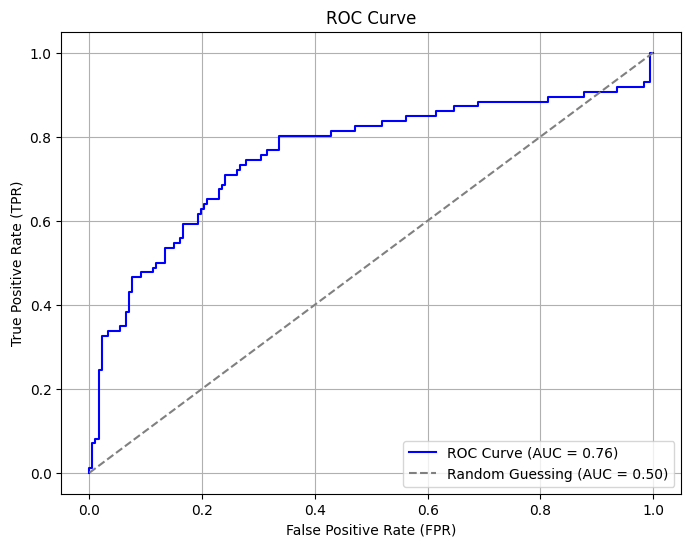

In [74]:
# probability prediction of positive classes(1)
y_proba = model.predict_proba(X_test)[:, 1]

# calculate FPR, TPR, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# calculate AUC
roc_auc = roc_auc_score(y_test, y_proba)

# drawing ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing (AUC = 0.50)', color='gray')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()
